
# Assignment: Linear Regression, Logistic Regression, and K-Means (From Scratch)

**Instructions**
- You are NOT allowed to use `scikit-learn` for model implementation, scaling.
- You may use it for implementation of clustering
- You may use: `numpy`, `matplotlib`, and standard Python libraries only.
- Every step (scaling, loss, gradients, optimization) must be implemented manually.
- Clearly comment your code and explain your reasoning in Markdown cells.


## Question 1: Linear Regression from Scratch (with Standardization and Regularization)

You are given a dataset `(X, y)`.

### Tasks
1. Implement **StandardScaler manually**:
   - Compute mean and standard deviation for each feature.
   - Standardize the features.
2. Implement **Linear Regression using Gradient Descent**.
3. Add **L2 Regularization (Ridge Regression)**.
4. Plot:
   - Loss vs iterations
   - True vs predicted values

Do NOT use `sklearn`.


In [2]:

import numpy as np
import matplotlib.pyplot as plt


In [3]:

# Implement StandardScaler manually ,  first read about it, how it works and then implement it
class StandardScalerManual:
    def fit(self, X):
        self.mean=np.mean(X,axis=0) # it stores mean of each column(feature) of X
        self.std=np.std(X,axis=0) # it stores standard deviation of each column(feature) of X
        pass

    def transform(self, X):
        # transform each element in X by (xi-mean)/std
        # scaling column wise automaticaaly
        return (X-self.mean)/self.std

    def fit_transform(self, X):
        pass


 This standerization is benificial as it basically makes data points comparable that are easy to implement in gradient descent due to which gradient descent works better and faster.

In [4]:

# Implement Linear Regression from scratch, here you have to also construct the regulization term coefficient of which will be
# denoted by l2_lambda
# try to implement L1 regularization or atlease read about it and where it is used
class LinearRegressionManual:
    def __init__(self, lr=0.01, epochs=1000, l2_lambda=0.0):
        self.lr=lr # it stores lr variable
        self.epochs=epochs # it stores epochs variable
        self.l2_lambda=l2_lambda # it stores l2_lambda variable
        self.weights=None # it stores values of weights here . initially intialize to empty vector

        self.loss=[] # it stores values of loss here . initially intialize to empty vector
        pass

    # training the model
    def fit(self, X, y):
        N,D=X.shape # N is no. of rows(examples) and D is no. of columns(features including bias)
        self.weights=np.zeros(D,dtype=np.float32) # initailze weight vector of size D x 1  to 0
        X=X.astype(np.float32)
        for i in range(self.epochs):
            # matrix multiplication
            # y=mx+c in maths operation
            y_pred= X @ self.weights # y_pred of size N x 1
            error= y-y_pred # error of size N x 1
            # mean square error
            mse=np.mean(error**2) # mse= 1/N(∑(y_predi-yi)**2)
            # regualarization to prevent overfitting as it add penality to make large weights small
            reg_term=self.l2_lambda*np.sum(self.weights**2)  # reg=lambda*(∑ wi**2)
            # total loss
            loss=mse+reg_term # loss=mse+reg=1/N(∑(y_predi-yi)**2)+ lambda*(∑ wi**2) in mathematically
            # at each iteration
            self.loss.append(loss)

            # calcualting gradient of loss
            grad=(-2/N)*(X.T@error)+2*self.l2_lambda*self.weights  # differntiation wrt weigth vector
                                                              # grad=(2/N)(X^T(y_pred-y))+ 2*lambda*w
            # upadating w in direction of mininmizing loss by gradient descent
            self.weights=self.weights-self.lr*(grad)



        pass
    # predicting the output
    def predict(self, X):
        y_pred=X@self.weights # y_pred of size N x 1
        return y_pred



We use rigde regression in linear regression that is adding the penality in error that is controlled by lambda(regularization strength) so instead of minimizing only mean square error to give a structure of training data  points , we minimize a complete loss including penalty to get a ridge regression curve  on which weights become comparable and fluctuations decreases.
output will become less sensitive to change in data points.



On testing datas

y_pred_test:
[105.19138894  28.52915273  58.32636086]

y_test:
[105.  25.  60.]

mse_train:  2.4514029168853844

mse_test:  5.097538896453476

On training datas

y_pred:
[19.85228915 19.99524275 36.92010911 37.06306271 49.79245088 62.52183904
 62.66479265 79.589659   79.73261261 92.46200078]

y:
[20. 22. 35. 38. 50. 65. 63. 80. 78. 95.]

weights:
[54.05940587 12.46119661 12.05059364]


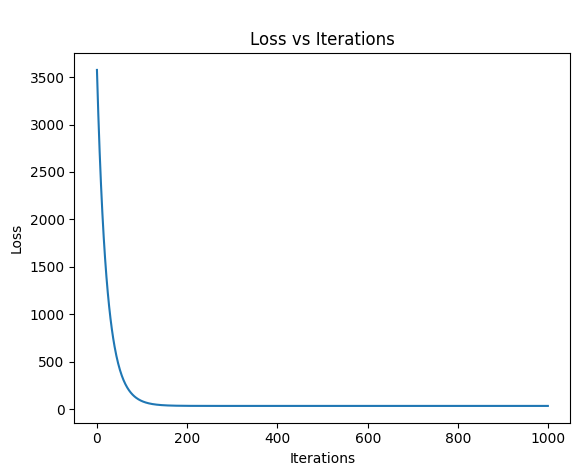

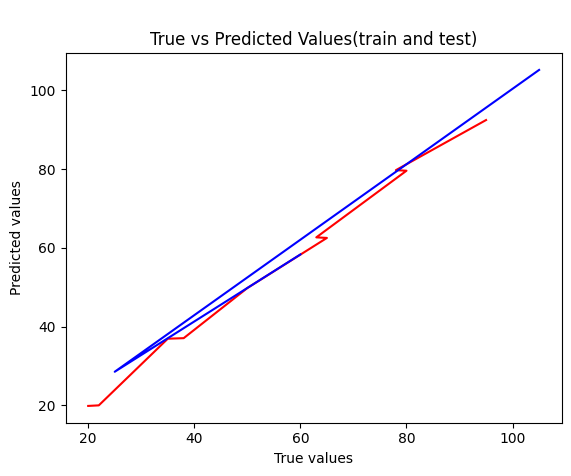

In [17]:
# implement model first by scaling all the input features to make their ownn mean =0 and std=1 to make gradient descent work fast
# input Data where rows represent no. of examples and columns represent no. of features

# training datas
X_train = np.array([
    [1, 2],
    [2, 1],
    [3, 4],
    [4, 3],
    [5, 5],
    [6, 7],
    [7, 6],
    [8, 9],
    [9, 8],
    [10, 10]
], dtype=float)

# actual output
y = np.array([20, 22, 35, 38, 50, 65, 63, 80, 78, 95], dtype=float)






# create object for standerization
scaler=StandardScalerManual()
# storing means and std of each features under function fit
scaler.fit(X_train)
# tranforming X to X_scaled  using function transform
X_train_scaled=scaler.transform(X_train)

# adding one column of 1 in X_scaled for bias
X_train_scaled=np.c_[np.ones(X_train_scaled.shape[0]),X_train_scaled]  # X_train_scaled size is N x D+1 where D is no. of input features

# implementing model from linear regression scratch
model=LinearRegressionManual(lr=0.01,epochs=1000,l2_lambda=0.01)
# training the model with standerization
model.fit(X_train_scaled,y)
# predicting the output
y_pred=model.predict(X_train_scaled)

# test datas
X_test = np.array([
    [11, 12],
    [3, 2],
    [6, 6]
], dtype=float)
# actual values of test datas
y_test = np.array([105, 25, 60], dtype=float)

# scaling from  same mean and std stored in self.mean and self.std
X_test_scaled=scaler.transform(X_test)

# adding one column of 1 in X_scaled for bias
X_test_scaled=np.c_[np.ones(X_test_scaled.shape[0]),X_test_scaled]

# predicitng values on test data
y_pred_test=model.predict(X_test_scaled)


# printing y_pred_test and y_test
print("\nOn testing datas")
print("\ny_pred_test:")
print(y_pred_test)
print("\ny_test:")
print(y_test)

# printing mse_train and mse_test
mse_train=np.mean((y-y_pred)**2)
mse_test=np.mean((y_test-y_pred_test)**2)
print("\nmse_train: ",mse_train)
print("\nmse_test: ",mse_test)






# printing y_pred and y
print("\nOn training datas")
print("\ny_pred:")
print(y_pred)
print("\ny:")
print(y)
# printing weights
print("\nweights:")
print(model.weights)

# ploting losses vs iterations
plt.plot(model.loss)
plt.xlabel('Iterations')
plt.ylabel('Loss')
plt.title('\nLoss vs Iterations')

# comparing predicated values and true values
plt.figure()
plt.plot(y,y_pred,color="red",label='Train')
plt.plot(y_test,y_pred_test,color="blue",label='Test')

plt.xlabel("True values")
plt.ylabel("Predicted values")
plt.title("\nTrue vs Predicted Values(train and test)")

plt.show()



Loss is gradually decreasing with iterations and at last iteration we minimizes loss to its minimum to get a required weights .We can see that we get a relationship between training datas and outputs which gives us y_pred and due to reguralization new data(testing datas) fits perfectly on the rigde regreesision curve .


As we can see that when regularization strength is 0 then we get a perfect relationship between training datas and actual output i.e predicted values are much closer to actual values and we say that graph is overfitting and for new testing datas , mean square error will be large then mse on train datas but on increasing strength graph can fits for new data points not only training data with less variance . Due to which values are not much closer to actual  values and we see a comparable mse on train and test datas.

In [11]:
# without standerization
# adding one column of 1 in X_scaled for bias
X_train=np.c_[np.ones(X_train.shape[0]),X_train]  # X size is N x D+1 where D is no. of input features
# training the model
model_without_standerization=LinearRegressionManual(lr=0.01,epochs=1000,l2_lambda=0.00)
model_without_standerization.fit(X_train,y)
y_pred_without_standerization=model_without_standerization.predict(X_train)
# printing y_pred and y
print("On training datas")
print("\ny_pred:")
print(y_pred_without_standerization)
print("\ny:")
print(y)
print("mse_train:",np.mean((y-y_pred_without_standerization)**2))
# printing weights
print("\nweights:")
print(model_without_standerization.weights)

# on testing datas
X_test=np.c_[np.ones(X_test.shape[0]),X_test]
y_pred_test_without_standerization=model_without_standerization.predict(X_test)
# printing y_pred_test and y_test
print("\nOn testing datas")
print("\ny_pred_test:")
print(y_pred_test_without_standerization)
print("\ny_test:")
print(y_test)
print("\nmse_test:",np.mean((y_test-y_pred_test_without_standerization)**2))










On training datas

y_pred:
[20.08282627 20.33274506 37.26810006 37.51801885 50.28201481 63.04601076
 63.29592955 80.23128456 80.48120335 93.2451993 ]

y:
[20. 22. 35. 38. 50. 65. 63. 80. 78. 95.]
mse_train: 2.1437551654270592

weights:
[7.31883031 4.42127784 4.17135905]

On testing datas

y_pred_test:
[106.00919525  28.92538196  58.87465171]

y_test:
[105.  25.  60.]

mse_test: 5.897835779732135



## Question 2: Logistic Regression from Scratch (with Standardization and Regularization)

You are given a binary classification dataset.

### Tasks
1. Reuse your **manual StandardScaler**.
2. Implement **Logistic Regression using Gradient Descent**.
3. Use:
   - Sigmoid function
   - Binary Cross Entropy loss
4. Add **L2 Regularization**.
5. Report:
   - Training loss curve
   - Final accuracy

Do NOT use `sklearn`.


In [19]:

#Implement sigmoid function as told in the lectures
def sigmoid(z):
    z=z.astype(np.float32)
    y=1/(1+np.exp(-z))
    return y
    pass


Sigmoid function normalizes real numbers to numbers between 0 and 1 which can used as probablities

In [30]:

#Implement Logistic Regression from scratch and here also add the regularizaation term
class LogisticRegressionManual:
    def __init__(self, lr=0.01, epochs=1000, l2_lambda=0.01):
      # initialzing
        self.lr=lr
        self.epochs=epochs
        self.l2_lambda=l2_lambda
        self.weights=None  # weights vector
        self.loss=[] # emptyvector which stores loss at every iteration
        pass

    def fit(self, X, y):
        N,D=X.shape  # D is no. of input features including bias column
        self.weights=np.zeros(D,dtype=np.float32)
        for i in range(self.epochs):
            y=y.astype(np.float32)
            z=X@self.weights  # of size N x 1 which contains  real numbers
            # normalize it in [0-1] by passing it from sigmoid function
            y_pred=sigmoid(z) # of size N x 1  which contains numbers from 0 to 1 as probablities of each examples
            # error
            error=y_pred-y #of size N x1
            cross_entropy_error=-np.mean(y*np.log(y_pred)+(1-y)*np.log(1-y_pred)) # of size 1 x 1
            # regularization for adding penalites for preventing overfitting
            reg_term=self.l2_lambda*np.sum(self.weights**2)   # reg=lambda*(∑ wi**2) = lambda*(W.T@W)(in matrix form )
            # total loss
            loss=cross_entropy_error+reg_term
            # at each iteration
            self.loss.append(loss)
            # calculating gradient and update weigths in direction of decreasing loss
            grad=(1/N)*(X.T@error)+ 2*self.l2_lambda*self.weights # grad=(1/N)(X^T(y_pred-y))+ 2*lambda*W
            # update weights
            self.weights=self.weights-self.lr*(grad)

        pass

    def predict_proba(self, X):
        y_pred_proba=sigmoid(X@self.weights)  # probabilities of categories of each example
        return y_pred_proba  # N x 1


    def predict(self, X):
        y_pred=sigmoid(X@self.weights) # probabilities of categories of each example
        y_pred[y_pred>0.5]=1  # belongs to class 1
        y_pred[y_pred<=0.5]=0 # belongs to class 0
        return y_pred  # N x 1





Similary here also we add a penalty but in the cross entropy error  to minimize a total loss to get required weigths.At last we threshold the predicted values in 0-1 that if values > 0.5 then it belongs to class 1 otherwise class 0

On testing datas

Probabilties:
[0.4467673  0.47550252 0.50440085 0.5332698  0.5619177  0.49672452
 0.49743968]

Classes:
[0. 0. 1. 1. 1. 0. 0.]

Accuracy:  0.7142857142857143

On training datas
Probabilites:
[0.43269554 0.454014   0.46128035 0.4828086  0.49012202 0.5117178
 0.5190296  0.54054874 0.5478104  0.5691109  0.4609249  0.48245144
 0.50404334 0.5256201  0.5471017 ]

Classes:
[0. 0. 0. 0. 0. 1. 1. 1. 1. 1. 0. 0. 1. 1. 1.]

Weights:
[0.00784534 0.08047115 0.09327822]

Accuracy:  1.0


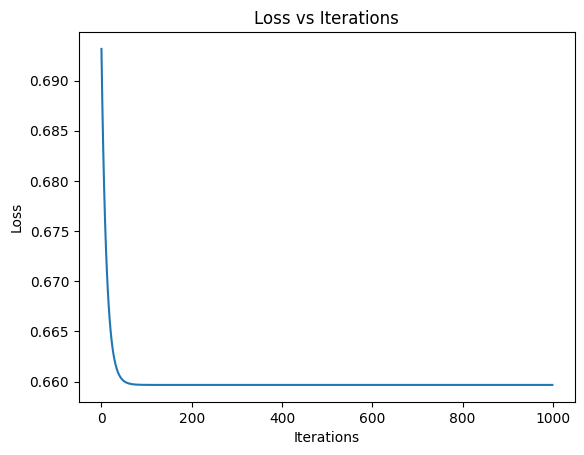

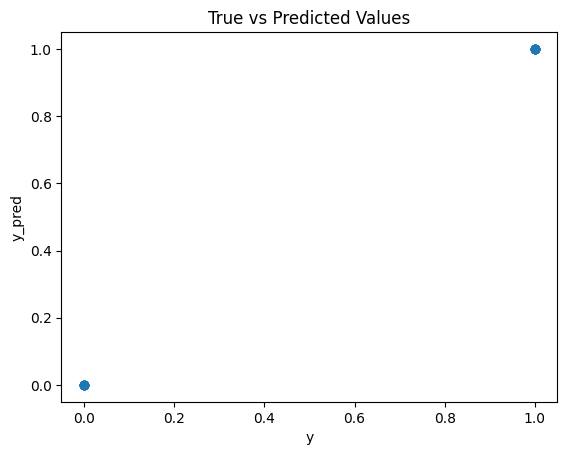

In [29]:
# implement model first by scaling all the input features to make their ownn mean =0 and std=1 to make gradient descent work fast
# input Data where rows represent no. of examples and columns represent no. of features


import numpy as np

 # [hours studied, practice tests]
X = np.array([
    [1, 0],
    [2, 1],
    [3, 1],
    [4, 2],
    [5, 2],
    [6, 3],
    [7, 3],
    [8, 4],
    [9, 4],
    [10, 5],
    [1, 2],
    [2, 3],
    [3, 4],
    [4, 5],
    [5, 6]
], dtype=float)

#  0 = fail, 1 = pass
y = np.array([0, 0, 0, 0, 0,
              1, 1, 1, 1, 1,
              0, 0, 1, 1, 1])



# create object for standerization
scaler=StandardScalerManual()
# storing means and std of each features under function fit
scaler.fit(X)
# tranforming X to X_scaled  using function transform
X_scaled=scaler.transform(X)
# adding one column of 1 to X (bias column)
X_scaled=np.c_[np.ones(X_scaled.shape[0]),X_scaled]  #of size N x D+1  where D is no. of input features

# implementing logistic regression model from scratch
model=LogisticRegressionManual(lr=0.01, epochs=1000, l2_lambda=0.01)
# training the model
model.fit(X_scaled,y)

y_pred_proba=model.predict_proba(X_scaled)  # stores probabilities of each example
y_pred=model.predict(X_scaled) # stores classes of each example


# test data
X_test = np.array([
    [1, 1],
    [3, 2],
    [5, 3],
    [7, 4],
    [9, 5],
    [2, 4],
    [6, 2],
], dtype=float)

# actual labels
y_test = np.array([0, 0, 0, 1, 1, 0, 1])


#scaling
X_test_scaled=scaler.transform(X_test)
# adding one column of 1 as bias
X_test_scaled=np.c_[np.ones(X_test_scaled.shape[0]),X_test_scaled]
# predicting the probabilites and classe
y_test_pred_proba=model.predict_proba(X_test_scaled)
y_test_pred=model.predict(X_test_scaled)

# print probabilites
print("On testing datas")
print("\nProbabilties:")
print(y_test_pred_proba)
# print classes
print("\nClasses:")
print(y_test_pred)
# print accuracy
print("\nAccuracy: ",np.mean(y_test_pred==y_test))


# print probab;ities
print("\nOn training datas")
print("Probabilites:")
print(y_pred_proba)
# print classes
print("\nClasses:")
print(y_pred)
# print weigths
print("\nWeights:")
print(model.weights)

# accuracy
accuracy=np.mean(y_pred==y)
print("\nAccuracy: ",accuracy)


# plot
plt.plot(model.loss)
plt.xlabel("Iterations")
plt.ylabel("Loss")
plt.title("Loss vs Iterations")

plt.figure()
plt.scatter(y,y_pred)
plt.xlabel('y')
plt.ylabel('y_pred')
plt.title('True vs Predicted Values')



plt.show()







## Question 3: K-Means Clustering from Scratch (Matrix Clustering)

You are given a **random matrix** `M` of shape `(n, m)`.

### Tasks
Implement K-Means clustering **from scratch** such that:

1. Input:
   - A random matrix `M`
   - Number of clusters `k`
2. Output:
   - `assignment_table`: a matrix of same shape as `M`, where each element stores the **cluster label**
   - `cookbook`: a dictionary (hashmap) where:
     - Key = cluster index
     - Value = list of **positions (i, j)** belonging to that cluster
   - `centroids`: array storing centroid values

You must cluster **individual elements**, not rows.


In [29]:

# Implement K-Means for matrix elements
#CAN USE SK-LEARN FOR THIS TASK AS THIS TASK WILL HELP US DIRECTLY IN OUR PROJECT !
import numpy as np
def kmeans_matrix(M, k, max_iters=100):
    n,m=M.shape # n is no.of rows and m is no. of columns
    # converting to float for maths operation
    M=M.astype(np.float32)
    # converting 2d array to 1d to avoid nested loops
    M_list=M.flatten()
    # inilizing  k centroids randomly from data points
    centroids=np.random.choice(M_list,k,replace=False) # It randomly picks k elements from data points and initalzie them to centroids
    #replace =False tells not to take similar points
    assignment_table_list=np.zeros(m*n)  # list of same length as M_list which contains clustor label of each data point
    for i in range(max_iters):
      # making  k clustors list of list which contains ith clustor at ith postion
      clustors=[[] for _ in range(k)]
      # Assignment step for assigning each data point to clustor
      for j in range(m*n):
         min_distance=float('inf')
         clustor_idx=0
         for p in range(k):
          # calculating distance of data point from each centroid
           distance=np.abs(M_list[j]-centroids[p])
           # finding nearest centroid
           if distance<min_distance:
              min_distance=distance
              # assigning (clustor_idx)th clustor  to data point M_list[j]
              clustor_idx=p
        # inserting clustors in a list whose idx are labels
         clustors[clustor_idx].append(M_list[j])
         # inserting clustor label in assignment list
         assignment_table_list[j]=(clustor_idx)
       # setting new centroids of each clustors to mean of clustor points
      for idx in range(k):
        centroids[idx]=np.mean(clustors[idx])
     # reshaping to same shape as M
    assignment_table=assignment_table_list.reshape(n,m)
    # making cookbook with
    # Key = cluster index
    #Value = list of positions (i, j) belonging to that cluster
    cookbook={i:[] for i in range(k)}

    for i in range(n):
      for j in range(m):
        clustor_label=assignment_table[i,j]
        cookbook[clustor_label].append((i,j))

    return assignment_table, cookbook, centroids
    pass

# inputs

M = np.array([[1, 2, 8],
              [3, 9, 10]])
k=2
# clustoring from scratch
assignment_table, cookbook, centroids = kmeans_matrix(M, k,100)
print("Assignment Table:")
print(assignment_table)
print("\nCookbook:")
print(cookbook)
print("\nCentroids:")
print(centroids)



Assignment Table:
[[1. 1. 0.]
 [1. 0. 0.]]

Cookbook:
{0: [(0, 2), (1, 1), (1, 2)], 1: [(0, 0), (0, 1), (1, 0)]}

Centroids:
[9. 2.]


In [32]:
# with standerization
scaler=StandardScalerManual()
scaler.fit(M)
M_scaled=scaler.transform(M)
print(M_scaled)
assignment_table_scaled, cookbook_scaled, centroids_scaled = kmeans_matrix(M_scaled, k,100)
print("\nAssignment Table(with standerization):")
print(assignment_table_scaled)
print("\nCookbook(with standerization):")
print(cookbook_scaled)
print("\nCentroids(with standerization):")
print(centroids_scaled)

[[-1. -1. -1.]
 [ 1.  1.  1.]]

Assignment Table(with standerization):
[[1. 1. 1.]
 [0. 0. 0.]]

Cookbook(with standerization):
{0: [(1, 0), (1, 1), (1, 2)], 1: [(0, 0), (0, 1), (0, 2)]}

Centroids(with standerization):
[ 1. -1.]



## Submission Guidelines
- Submit the completed `.ipynb` file.
- Clearly label all plots and outputs.
- Code readability and correctness matter.
- Partial credit will be given for logically correct implementations.

**Bonus**
- Compare convergence with and without standardization.
- Try different values of regularization strength.
